<a href="https://colab.research.google.com/github/nahidkawsar/Cat-Vs-Dog-CNN/blob/main/Copy_of_cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is the dataset from keggle

In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

# **Have to Run this code first**

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/ #This is the directory of the json file

#  **This is the API Command**

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 97% 1.04G/1.06G [00:09<00:00, 285MB/s]
100% 1.06G/1.06G [00:09<00:00, 120MB/s]


**1.Refresh the file**

**2.We will get a zip formate.**

**For unzipping run the next command**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') #Here /content/dogs-vs-cats.zip is the zipped files path
zip_ref.extractall('/content')
zip_ref.close()

# Refresh again.
we will get test train

**importing necessary libraries**

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

*As we have a huge amount of data we cannot load them in a single time.For that we will divide our data into batches by ** **Generator**

# **The name of the genertor is**:image_dataset_from_directory

In [8]:
# generators
#For training dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int', #For which cats will get 0 and dogs will 1
    batch_size=32,
    image_size=(256,256) # All the images will be reshaped into 256*256*3 as our CNN model wants everything in the same size
)

#For test or validation dataset

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int', #For which cats will get 0 and dogs will 1
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


**Now here the images are stored as a numpy array formate,where the values are from 0 to 255,we want them to be between 0 to 1.Meaning we need to normalize them**

In [9]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# **Creating CNN model**

**Now in our CNN architecture we want 3 Convolution layers with (3*3) filters.With Max pooling with pool size=(2,2)**

<font color='green'>First one with 32 filtes</font>

<font color='green'>Second one with 32 filtes</font>

<font color='green'>Third one with 32 filtes</font>




In [10]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 79s 107ms/step - loss: 1.2353 - accuracy: 0.6156 - val_loss: 0.6120 - val_accuracy: 0.6716
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5616 - accuracy: 0.7184 - val_loss: 0.5733 - val_accuracy: 0.7546
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4623 - accuracy: 0.7831 - val_loss: 0.5600 - val_accuracy: 0.7516
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4072 - accuracy: 0.8151 - val_loss: 0.6403 - val_accuracy: 0.7212
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3590 - accuracy: 0.8417 - val_loss: 0.6337 - val_accuracy: 0.7558
Epoch 6/10
625/625 [==============================] - 66s 104ms/step - loss: 0.2679 - accuracy: 0.8839 - val_loss: 0.4828 - val_accuracy: 0.7724
Epoch 7/10
625/625 [==============================] - 66s 104ms/step - loss: 0.1952 - accuracy: 0.9194 - val_loss: 0.6017 - val_ac

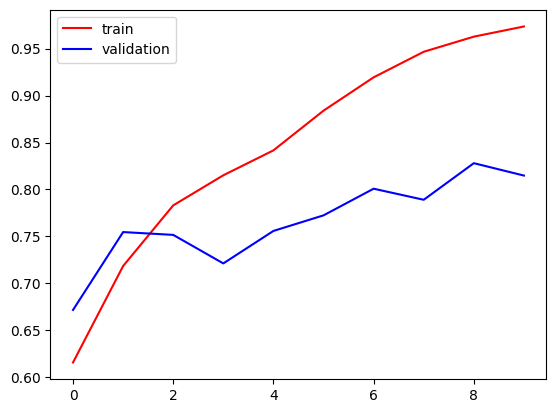

In [15]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

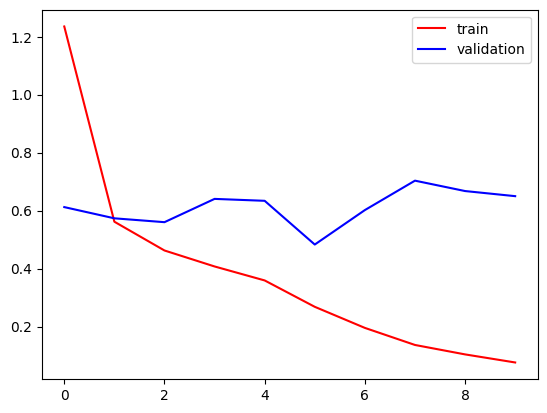

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [55]:
import cv2

In [56]:
test_img = cv2.imread('/content/cat.jpg')

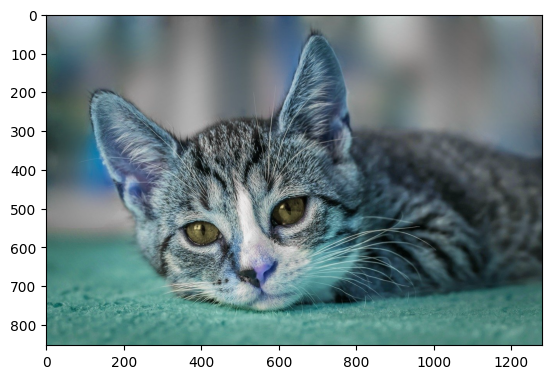

In [57]:
plt.imshow(test_img)

In [58]:
test_img.shape

(853, 1280, 3)

In [59]:
test_img = cv2.resize(test_img,(256,256))

In [60]:
test_input = test_img.reshape((1,256,256,3))

In [61]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

In [62]:
test_img_dog = cv2.imread('/content/dog.jpg')

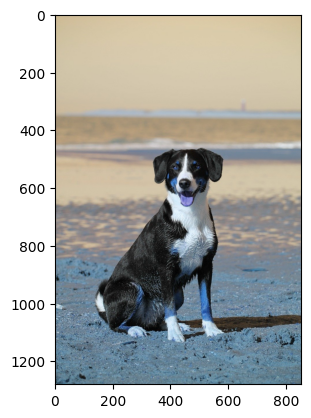

In [63]:
plt.imshow(test_img_dog)

In [64]:
test_img_dog.shape

(1280, 853, 3)

In [65]:
test_img_dog = cv2.resize(test_img_dog,(256,256))

In [66]:
test_input_dog = test_img_dog.reshape((1,256,256,3))

In [67]:
model.predict(test_input_dog)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)